# Equações diferenciais

Este notebook conterá um pequeno tutorial de como utilizar o pacote para resolução de quações diferenciais que será utilizado para fazer as simulações.

In [15]:
using DifferentialEquations
using Plots

Aqui focaremos na resolução de equações diferenciais ordinárias, o primeiro exmplo a ser tratado será a equação de Lorenz.

\begin{align}
\frac{dx}{dt} &= σ(y-x) \\
\frac{dy}{dt} &= x(ρ-z) - y \\
\frac{dz}{dt} &= xy - βz \\
\end{align}

Primeiro iremos definir o problema em uma função


In [16]:
function lorenz(t,u,du)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

Agora que temos a função criada iremos definir a condição inicial e o período desejado, após isso basta criar o nosso problema e depois utilizar o solver para obter a solução.

In [17]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob);

Para ver os valores de resposta basta fazermos

In [18]:
sol.u

1281-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                    
 [0.999643, 0.000998805, 1.78143e-8]
 [0.996105, 0.0109654, 2.14696e-6]  
 [0.969359, 0.0897701, 0.0001438]   
 [0.924204, 0.242289, 0.00104616]   
 [0.880046, 0.438736, 0.00342426]   
 [0.848331, 0.691563, 0.00848763]   
 [0.849504, 1.01454, 0.018212]      
 [0.913906, 1.44255, 0.0366935]     
 [1.08886, 2.05232, 0.0740252]      
 [1.46085, 3.02065, 0.160037]       
 [2.16271, 4.63333, 0.377112]       
 [3.36844, 7.26764, 0.936342]       
 ⋮                                  
 [-0.401316, -0.790441, 14.1037]    
 [-0.686862, -1.23833, 11.9516]     
 [-1.19475, -2.19199, 10.0667]      
 [-2.34869, -4.44683, 8.5789]       
 [-5.08734, -9.74666, 8.80393]      
 [-10.6108, -18.9553, 15.6511]      
 [-16.3075, -21.3604, 32.5498]      
 [-15.9781, -9.44551, 42.7483]      
 [-10.4682, 1.16357, 39.4559]       
 [-4.6893, 4.4491, 33.0262]         
 [-0.246424, 4.56595, 27.1928]      
 [1.01877, 4.45786, 25.0928]       

Da mesma forma para o tempo

In [19]:
sol.t

1281-element Array{Float64,1}:
   0.0        
   3.56786e-5 
   0.000392465
   0.00326239 
   0.00905806 
   0.0169565  
   0.02769    
   0.0418563  
   0.0602402  
   0.0836852  
   0.113364   
   0.148621   
   0.187039   
   ⋮          
  99.2829     
  99.346      
  99.414      
  99.4922     
  99.5771     
  99.6612     
  99.7342     
  99.7949     
  99.8503     
  99.9042     
  99.969      
 100.0        


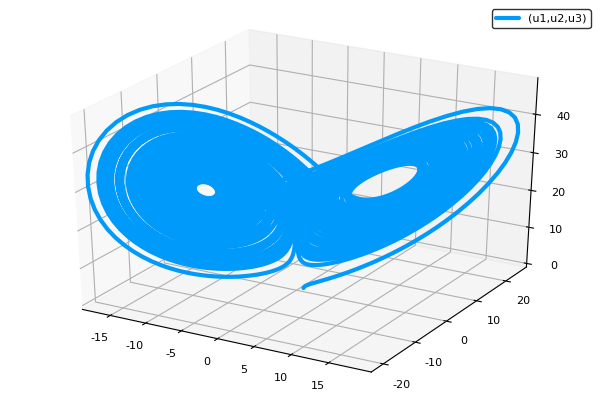

In [20]:
plot(sol,vars=(1,2,3))

Se quisermos ver o valor de uma única variável em função do tempo basta fazermos


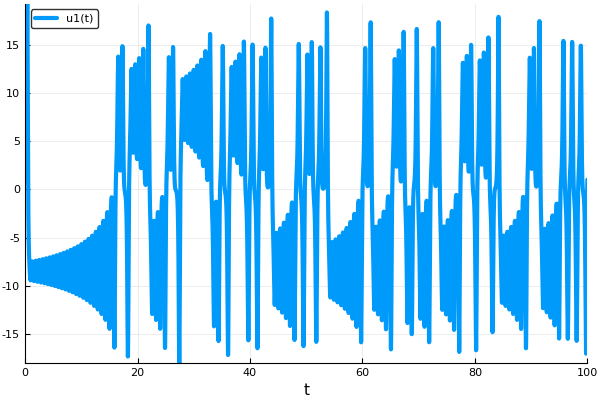

In [21]:
plot(sol,vars=(0,1))

## Problemas de controle

Em problemas de controle normalmente temos uma variável que muda de valor de tempo em tempo, este é o sinal de controle e o período de atualização é normalmente o intervalo entre um leitura dos sensores do sistema(período de discretização). Para simular esses sistemas é necessário fazer essa atualização da ação de controle nessa frequência desejada, para isso utilizaremos funções de tratamento de eventos e retorno de chamada.

A primeira coisa a fazer será definir um DEDataArray{T} para assim podermos utilizar a nossa variável "não contínua" que será o sinal de controle.


In [22]:
type SimType{T} <: DEDataVector{T}
    x::Array{T,1}
    f1::T
end

Agora vamos definir a função do nosso problema, nela a nossa variável de controle será f1

In [23]:
function f(t,u,du)
    du[1] = -0.5*u[1] + u.f1
    du[2] = -0.5*u[2]
end

f (generic function with 1 method)

O próximo passo é definir a função que será chamada em cada intervalo de discretização

In [24]:
function affect!(integrator)
  for c in user_cache(integrator)
    c.f1 = randn()*10
  end
end  

affect! (generic function with 1 method)

Agora criamos o nosso callback periódico com periodo de 3 segundos e com nossa função affect!

In [25]:
cbs = PeriodicCallback(affect!,3.0);

O próximo passo é criar o estado inicial do nosso sistema(lembrando que aqui usaremos no novo vetor que criamos no começo, contendo a nossa variável de controle) e montar o nosso problema. A simulação será realizada de 0 até 12 segundos.

In [26]:
u0 = SimType([10.0;10.0], 0.0)
prob = ODEProblem(f,u0,(0.0,12.0));

Por fim utilizamos o solver com o callback

In [27]:
sol = solve(prob,Tsit5(),callback = cbs);


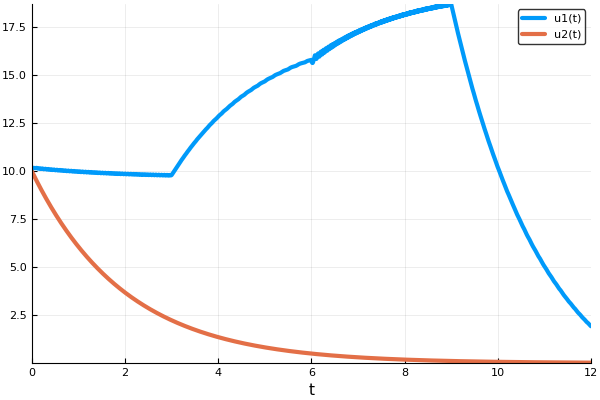

In [28]:
plot(sol)

Vemos que a cada 3 segundos a resposta do nosso sistema muda de direção, isso porque mudamos o valor do sinal de controle.
Mais detalhes sobre o pacote podem ser encontrados em http://docs.juliadiffeq.org/stable/index.html.